<font face="Times New Roman" size=5><div dir=rtl align=center>
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br> <br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Computer
</font>
<br> <br>
<font color="#008080" size=5>
Introduction to Machine Learning
</font>

<hr/> <br>
<font color="#800080" size=6>
Chapter 2: Linear Regression
<br>
</font>
<br>
<font face="Times New Roman" size=4>
:authors <br>
<b>Amirmohammad Isazadeh</b>
</font>
<hr>
</div></font>

<font  size=5><div dir=ltr>
<font face="Times New Roman" color="#008080" size=5>**Table of Contents**</font>
<br>

<font size=4>
<ul>
    <li>
        <a href="#1">
            1. Linear Regression
        </a>
    </li>
    <ul>
          <li>
                <a href="#1-1">
                    1-1. From Scratch
                </a>
            </li>
        <ul>
            <li>
                <a href="#1-1-1">
                    1-1-1. Closed Form
                </a>
            </li>
            <li>
                <a href="#1-1-2">
                    1-1-2. Using Optimization Function (Gradient Descent)
                </a>
            </li>
        </ul>
        </ul>
    <li>
        <a href="#2">
            2. Beyond Linear Regression
        </a>
    </li>
    <ul>
        <li>
            <a href="#2-1">
                2-1 Elastic Net
            </a>
        </li>
        <ul>
            <li>
                <a href="#2-1-1">
                    2-1-1 Lasso VS Ridge
                </a>
            </li>
        </ul>
    </ul>
</ul>
</div>

<font face="Times New Roman"><div id="1">
# <font color="#800080" size=6>**1. Linear Regression**</font>
</div>

<font face="Times New Roman"><div id="1-1">
## <font color="#800080" size=6>**1-1. From Scratch** </font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Dataset**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

<font face="Times New Roman" size=3>
To estimate the productivity of apples and oranges, we will use a simple dataset containing metrics like temperature, rainfall, and humidity across different regions.
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [1]:
# We use numpy to define our inputs and targets
import numpy as np

# dataset (temp, rainfall, humidity, apples, oranges)
df = np.array([[73, 67, 43, 56, 70],
                   [91, 88, 64, 81, 101],
                   [87, 134, 58, 119, 133],
                   [102, 43, 37, 22, 37],
                   [69, 96, 70, 103, 119]], dtype='float32')

# reigons which are used as indexes
regions = ["Semnan", "Golestan", "Gilan", "Ghazvin", "Mazandaran"]
# parameters
columns = ["Temp(F)", "Rainfall(mm)", "Humidity(%)", "Apples(ton)", "Oranges(ton)"]

In [2]:
# We use pandas to represent dataset
import pandas as pd

# Creating dataframe using variable columns as columns and regions as index
df = pd.DataFrame(df, columns=columns, index=regions)

df

,Temp(F),Rainfall(mm),Humidity(%),Apples(ton),Oranges(ton)
Semnan,73.0,67.0,43.0,56.0,70.0
Golestan,91.0,88.0,64.0,81.0,101.0
Gilan,87.0,134.0,58.0,119.0,133.0
Ghazvin,102.0,43.0,37.0,22.0,37.0
Mazandaran,69.0,96.0,70.0,103.0,119.0


##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [3]:
# Separate dataset to two parts: X (inputs) - Y (productivity amount)
X = df.iloc[:, :3].to_numpy()
Y = df.iloc[:, 3:].to_numpy()

# Based on Y = X * W + b the element of b just add a constant value to XW so we can add 1 to each row of X without any change in the output
X = np.append(np.ones((5, 1)), X , axis=1)
X

array([[  1.,  73.,  67.,  43.],
       [  1.,  91.,  88.,  64.],
       [  1.,  87., 134.,  58.],
       [  1., 102.,  43.,  37.],
       [  1.,  69.,  96.,  70.]])

<font face="Times New Roman"><div id="1-1-1">
### <font color="#800080" size=5>**1-1-1. Closed Form**</font>
</div>

In [4]:
# Closed form of Linear Regression Implementation

# A function to implement its equation and return predicted W
def normal_equation(X, Y):
    W = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y))
    return W

# .dot() represent matrix multiplication in numpy
def lr_predict(X, W):
    return np.dot(X, W)

# Main function of closed form: it gets X and Y and returns its predictions correspond to input X
def closed_form_lr(X, Y):
    W = normal_equation(X, Y)
    predictions = lr_predict(X, W)
    return predictions

# MSE loss
def mse_loss(pred, real):
    diff = pred - real
    return np.sum(diff * diff) / diff.size

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction</font>

In [5]:
predictions = closed_form_lr(X, Y)

##### <font color="#008080" face="Times New Roman" size=4> - Loss </font>

In [6]:
mse_loss(predictions, Y)

0.4831212220582056

<font face="Times New Roman"><div id="1-1-2">
### <font color="#800080" size=5>**1-1-2. Using Optimization Function (Gradient Descent)**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Start with random weights**</font>

In [7]:
# Random initialization for weights
W = np.random.rand(4, 2)
W

array([[0.43976286, 0.76132137],
       [0.17629239, 0.90326699],
       [0.27064813, 0.47093284],
       [0.3155299 , 0.57912851]])

In [8]:
# Use lr_predict from last section to find predictions by new weights
predictions = lr_predict(X, W)
predictions

array([[ 45.01031787, 123.15483813],
       [ 60.49331951, 161.46493235],
       [ 70.3447845 , 176.0400042 ],
       [ 41.73406285, 134.57242161],
       [ 60.67325124, 148.83529231]])

In [9]:
# Calculate loss of our predictions
loss = mse_loss(predictions, Y)
print(loss)

2383.402289928006


#### <font color="#008080" face="Times New Roman" size=4>**Gradient Descent**</font>

In [10]:
# Implementation of gradient
def calc_gradient(X, error):
    gradient = np.dot(X.T, error)
    return gradient

# Implementation of updating weights by using their gradient
def update_weights(W, lr, gradient):
    new_weights = W - lr * gradient
    return new_weights

#### <font color="#008080" face="Times New Roman" size=4>**Train**</font>

In [11]:
def train_model_lr_gd(X, Y, W, n_epoches, lr):
    losses = []
    for i in range(n_epoches):
        # generating the predictions
        predictions = lr_predict(X, W)
        error = predictions - Y
        # calculating the loss
        loss = mse_loss(predictions, Y)
        # adding the loss to our loss list
        losses.append(loss)
        # calculating gradients
        gradient = calc_gradient(X, error) / Y.size
        # updating weights and biases
        W = update_weights(W, lr, gradient)
    return W, losses

#### <font color="#008080" face="Times New Roman" size=4>**Test**</font>

In [12]:
# Use our model with learning rate 1e-5 and 10000 epochs and keep all loss values
lr = 1e-5
n_epoches = 10000
W, losses = train_model_lr_gd(X, Y, W, n_epoches, lr)
print(losses[-1])

0.537991129997355


#### <font color="#008080" face="Times New Roman" size=4>**Visualization**</font>

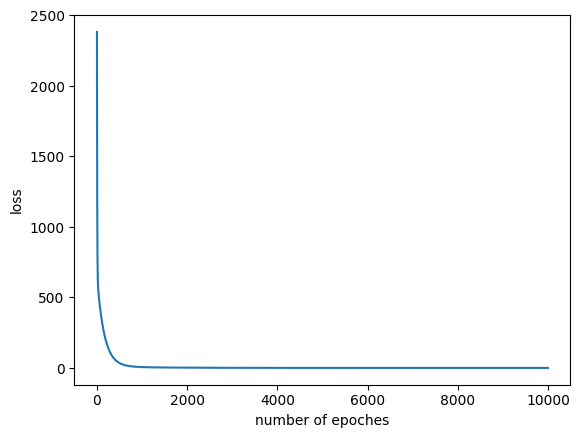

In [13]:
import matplotlib.pyplot as plt

# x axis values
x = [i for i in range(n_epoches)]
# corresponding y axis values
y = losses

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('number of epoches')
# naming the y axis
plt.ylabel('loss')

# function to show the plot
plt.show()

<font face="Times New Roman"><div id="2">
# <font color="#800080" size=6>**2. Beyond Linear Regression**</font>
</div>

<font face="Times New Roman"><div id="2-1">
## <font color="#800080" size=6>**2-1. Elastic Net**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Model**</font>

In [14]:
class Regression:

    def __init__(self, regularization, lr, epoch):
        self.m = None #samples
        self.n = None #features
        self.w = None #weight
        self.b = None #bias
        self.regularization = regularization #penalty object
        self.lr = lr #learning rate
        self.epoch = epoch #iteration

    def __calculate_cost(self, y, y_pred):
        return (1 / (2*self.m)) * np.sum(np.square(y_pred-y)) + self.regularization(self.w)

    def __hypothesis(self, w, X):
        return np.dot(X, w)

    def __initialization(self, X):
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.w = np.zeros((self.n,1))
        return X

    def __update_parameters(self, X, y, y_pred):
        dw = (1/self.m) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
        self.w = self.w - self.lr * dw
        return True

    def fit(self, X, y):
        X = self.__initialization(X)
        for e in range(1, self.epoch+1):
            y_pred = self.__hypothesis(self.w, X)
            cost = self.__calculate_cost(y, y_pred)
            self.__update_parameters(X, y, y_pred)
            if e % 5000 == 0:
#                 print(f"The Cost in iteration {e}----->{cost} :)")
                pass

        return True

    def predict(self, X_test):
        X_test = np.insert(X_test, 0 , 1, axis= 1)
        y_pred = self.__hypothesis(self.w, X_test)
        return y_pred

class ElasticPenalty:

    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l
        self.l_ratio = l_ratio

    def __call__(self, w):
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(w))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(w))
        return (l1_contribution + l2_contribution)

    def derivation(self, w):
        l1_derivation = self.l * self.l_ratio * np.sign(w)
        l2_derivation = self.l * (1 - self.l_ratio) * w
        return (l1_derivation + l2_derivation)

class ElasticNet(Regression):

    def __init__(self, l, l_ratio, lr, epoch):
        self.regularization = ElasticPenalty(l,l_ratio)
        super().__init__(self.regularization, lr, epoch)

<font face="Times New Roman"><div id="2-1-1">
### <font color="#800080" size=5>**2-1-1. Lasso VS Ridge**</font>
</div>

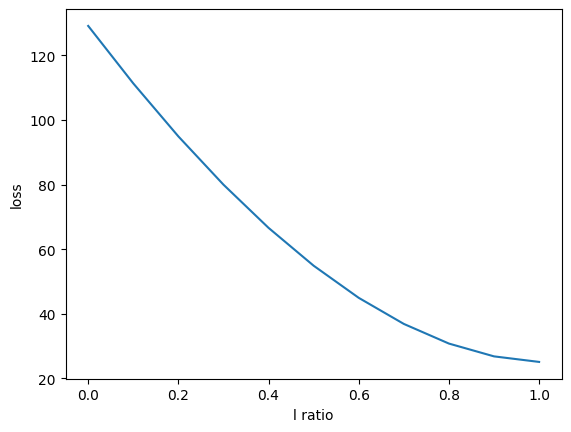

In [15]:
from sklearn.datasets import make_regression

# Creating the dataset
X, y = make_regression(n_samples=50000, n_features=8, noise=5)
y = y[:, np.newaxis]

losses = []
for i in range(11):
    parameters = {
        "l_ratio" : i * 0.1,
        "l" : 0.1,
        "lr" : 0.001,
        "epoch" : 10000
    }
    model = ElasticNet(**parameters)
    model.fit(X, y)
    y_pred = model.predict(X)
    losses.append(mse_loss(y_pred, y))

x = [i * 0.1 for i in range(11)]
y = losses
plt.plot(x, y)
plt.xlabel('l ratio')
plt.ylabel('loss')
plt.show()

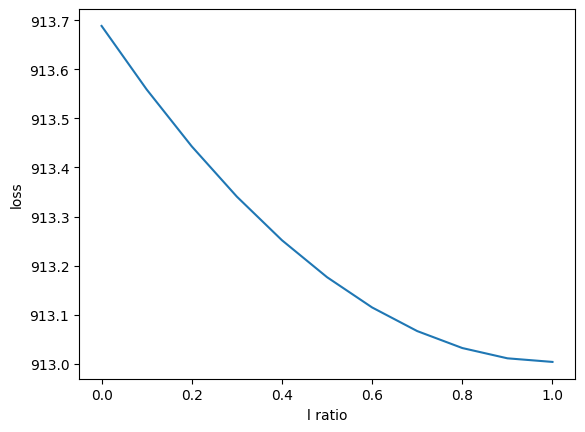

In [16]:
# Creating the dataset
X, y = make_regression(n_samples=5000, n_features=3, noise=3)
y = y[:, np.newaxis]

for i in range (5000):
    if i % 4 == 0:
        X[i] = X[i] * 20
        y[i] = y[i] * 20
losses = []
for i in range(11):
    parameters = {
        "l_ratio" : i * 0.1,
        "l" : 0.1,
        "lr" : 0.0001,
        "epoch" : 10000
    }
    model = ElasticNet(**parameters)
    model.fit(X, y)
    y_pred = model.predict(X)
    losses.append(mse_loss(y_pred, y))
x = [i * 0.1 for i in range(11)]
y = losses
plt.plot(x, y)
plt.xlabel('l ratio')
plt.ylabel('loss')
plt.show()